# Ghost flux ratio calculation

Use ginga application 

1. start ginga
2. start remote (Plugins-> Remote -> Remote Control)

is also use ginga viewer embedded to save distance fits image (to png)

## specify save folder 
imgPath

In [1]:
import sep
import matplotlib.pyplot as plt
from pfs.imageAnalysis import createSepMask, plotOnePeak
from pfs.fileHandling import *

In [2]:
from matplotlib import style
style.use('ggplot')

imgPath = '/home/pfs/shared/Pictures/SM1/'
imgPath = '/home/fmadec/Pictures/SM1/'
#imgPath = '/home/fmadec/shared/Pictures/SM1/ghost'

In [3]:
from ginga import __version__
__version__

'3.0.1'

In [4]:
# import ginga remote control module
from ginga.util import grc

In [5]:
# host and port parameters can be set in the graphical ui of the plugin.
# These are the defaults
viewer = grc.RemoteClient('localhost', 9000)
#viewer = grc.RemoteClient('ws1.pfs', 9001)

In [6]:
viewer.host

'localhost'

In [7]:


# This gives you a handle to the reference viewer shell.
# It is similar to what you can do from the command line with:
#    $ grc ginga ...
#
shell = viewer.shell()
# the RC plugin in the viewer
shell.add_channel('ref')
peakCh = viewer.channel('ref')

shell.add_channel('ghost')
ghostCh = viewer.channel('ghost')
canvas = viewer.canvas('ghost')

In [8]:
doSave = False

# Specify files entries

experimentid, cam used and wave (either wavelenght or source used)

In [9]:
drpPath = "/home/fmadec/pfs/subaruData"
repo = "drp"  # relative path to drpPath
rerun = "sm1-march2020-ghost"

In [10]:
peakExpId = 163 #1067 #1088 #1075 
ghostExpId = 165#1090 #1073 
cam = "r1"

In [11]:

peakFilelist = constructFilelist(peakExpId, rerun=rerun, repo=repo, basePath=drpPath, doPrint=True, subaru=True)
peakFilelist = peakFilelist[peakFilelist.cam == cam].reset_index()
peakFilepath = peakFilelist.filepath[0]

filepath =  /home/fmadec/pfs/subaruData/drp/rerun/sm1-march2020-ghost/detrend/calExp/2020-04-15/v001896/calExp-SA001896r1.fits
site =  S
filepath =  /home/fmadec/pfs/subaruData/drp/rerun/sm1-march2020-ghost/detrend/calExp/2020-04-15/v001897/calExp-SA001897r1.fits
site =  S
filepath =  /home/fmadec/pfs/subaruData/drp/rerun/sm1-march2020-ghost/detrend/calExp/2020-04-15/v001898/calExp-SA001898r1.fits
site =  S
filepath =  /home/fmadec/pfs/subaruData/drp/rerun/sm1-march2020-ghost/detrend/calExp/2020-04-15/v001899/calExp-SA001899r1.fits
site =  S
filepath =  /home/fmadec/pfs/subaruData/drp/rerun/sm1-march2020-ghost/detrend/calExp/2020-04-15/v001900/calExp-SA001900r1.fits
site =  S
date =  2020-04-15
visitStart =  1896
visitEnd =  1900


In [87]:
ghostFilelist = constructFilelist(ghostExpId, rerun=rerun, repo=repo, basePath=drpPath, subaru=True)
ghostFilelist = ghostFilelist[ghostFilelist.cam == cam].reset_index()
ghostFilepath = ghostFilelist.filepath[1]

In [88]:
ghostFilelist

,index,filepath,experimentId,cam,obsdate,visitId
0,0,/home/fmadec/pfs/subaruData/drp/rerun/sm1-marc...,165,r1,2020-04-15,1906
1,1,/home/fmadec/pfs/subaruData/drp/rerun/sm1-marc...,165,r1,2020-04-15,1907
2,2,/home/fmadec/pfs/subaruData/drp/rerun/sm1-marc...,165,r1,2020-04-15,1908
3,3,/home/fmadec/pfs/subaruData/drp/rerun/sm1-marc...,165,r1,2020-04-15,1909
4,4,/home/fmadec/pfs/subaruData/drp/rerun/sm1-marc...,165,r1,2020-04-15,1910


In [14]:
# example of loading an HDU from an astropy HDUlist
# parameters are (image_name, channel_name, hdulist, hdulist_key)
#
from astropy.io import fits
peakHdulist = fits.open(peakFilepath, "readonly")
peakCh.load_hdu("r", peakHdulist, 1)

0

In [89]:
from astropy.io import fits
ghostHdulist = fits.open(ghostFilepath, "readonly")
ghostCh.load_hdu("r", ghostHdulist, 1)

0

# Centroid
you can either set peakCentroid to None or give x y

for ghost you have to specify the centroid

In [ ]:

wave =  "860nm" # "hgar"
cam="m1"

In [ ]:

wave =  "860nm" # "hgar"
cam="b1"

In [ ]:
peakCentroid =  [1626 ,2978 ] #None #[1920 ,3852 ]

In [ ]:
ghostCentroid = [1923 ,3843 ]

In [ ]:
# B1
peakCentroid =  [1626 ,2978 ] #None #[1920 ,3852 ]
ghostCentroid = [2270 ,3345 ]

In [16]:
# R1
peakCentroid =  [1991 , 419 ] #None #[1920 ,3852 ]
ghostCentroid = [1917 , 1552 ]
cam = "r1"
wave =  "660nm" # "monochromator"


In [52]:
# R1
peakCentroid =  [1998 , 554 ] #None #[1920 ,3852 ]
ghostCentroid = [1917 , 1552 ]
cam = "r1"
wave =  "6-700nm" # Hgar


# Peak detection

You can change the thresold and mask size

typically thresold = 5000 and mask_size = 30

In [76]:
# Find main peak centroid and flux
peakData = peakHdulist[1].data

peakObjects = sep.extract(peakData ,5000)
mask_size=  40

if peakCentroid is None:
    mask = createSepMask(peakData.shape,peakObjects['x'][0], peakObjects['y'][0], mask_size=mask_size )
else:
    mask = createSepMask(peakData.shape,peakCentroid[0], peakCentroid[1], mask_size=mask_size  )


peakObjects = sep.extract(peakData ,5, mask=mask, segmentation_map=True)
peakMap = peakObjects[1]
peakObjects = sep.extract(peakData ,5, mask=mask)

len(peakObjects)
df_peakObjects = pd.DataFrame(peakObjects, columns=peakObjects.dtype.names)

In [77]:
print(len(peakObjects))
print(peakObjects['x'])
print(peakObjects['y'])

4
[1997.39838234 1997.70709386 1997.58246091 1997.47950527]
[552.65720435 570.80875602 540.77657192 535.17147963]


In [55]:
df_peakObjects[["x", "y", "flux"]]

,x,y,flux
0,1997.398382,552.657204,791.212219
1,1997.383088,573.425298,295.639587
2,1997.497183,532.609413,284.036804


In [90]:
# Find ghost centroid and flux
ghostData = ghostHdulist[1].data
thres = 100
mask_size=  80

#ghostObjects = sep.extract(peakData ,2000)


#mask = createSepMask(peakData.shape,ghostObjects['x'][0], ghostObjects['y'][0] )
#ghostMask = createSepMask(ghostData.shape,1919, 1554, mask_size=20 )

ghostMask = createSepMask(ghostData.shape,ghostCentroid[0], ghostCentroid[1], mask_size=mask_size)

ghostObjects = sep.extract(ghostData ,thres, mask=ghostMask, segmentation_map=True)
ghostMap = ghostObjects[1]
ghostObjects = sep.extract(ghostData ,thres, mask=ghostMask)

flux, fluxerr, flag = sep.sum_circle(ghostData, ghostObjects['x'], ghostObjects['y'], 8.0)


len(ghostObjects)
df_ghostObjects = pd.DataFrame(ghostObjects, columns=ghostObjects.dtype.names)

In [91]:
print(len(ghostObjects))
print(ghostObjects['x'])
print(ghostObjects['y'])
#print(flux)

12
[ 147.76410537  156.67187788  641.85625081 2477.37310907 2577.10428715
 2758.28628554 1888.17901254 1897.50730119 1893.03806753 1889.35025433
 1911.26408555 1905.64065937]
[3.11783903e-01 3.33333338e-01 2.71194272e-01 2.33765986e-01
 3.13977634e-01 2.93202861e-01 1.53047785e+03 1.58446067e+03
 1.58647889e+03 1.58830911e+03 1.57772656e+03 1.58056917e+03]


In [92]:
df_ghostObjects[["x", "y", "flux"]]

,x,y,flux
0,147.764105,0.311784,3309.443115
1,156.671878,0.333333,7333.576660
2,641.856251,0.271194,1596.790283
3,2477.373109,0.233766,1809.930786
4,2577.104287,0.313978,4697.883301
5,2758.286286,0.293203,1624.618286
6,1888.179013,1530.477846,7262.994629
7,1897.507301,1584.460669,8513.106445
8,1893.038068,1586.478892,5425.921875
9,1889.350254,1588.309110,4077.513672


# Select ghost peak

even if you specificy ghost centroid, the sep detection may found several peaks, so you need to specify which one to use

In [97]:
iGhost = 6
iPeak = 0

In [98]:
cx, cy, flux = df_ghostObjects.iloc[iGhost][["x", "y", "flux"]].values
print(cx, cy)

1888.1790125390748 1530.4778462717222


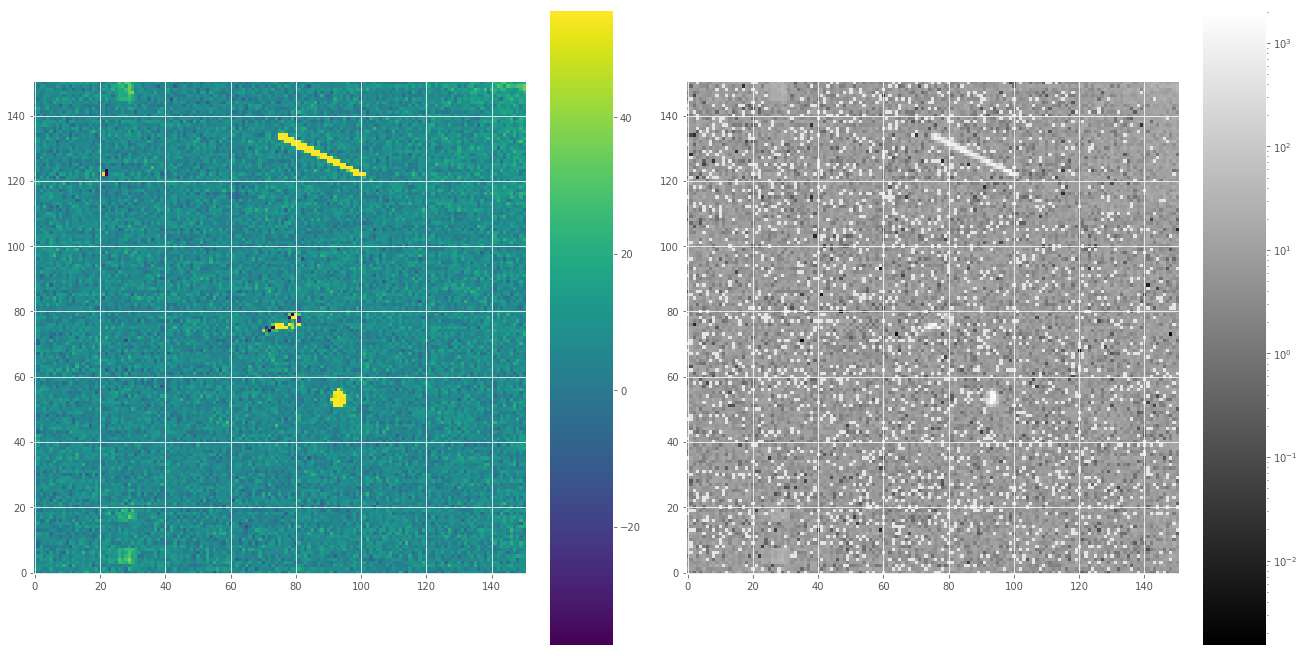

In [99]:

plotOnePeak(ghostData, cx, cy, roi_size=150)

In [81]:
cx, cy, flux = df_peakObjects.iloc[iPeak][["x", "y", "flux"]].values
print(cx, cy)

1997.398382341027 552.6572043525575


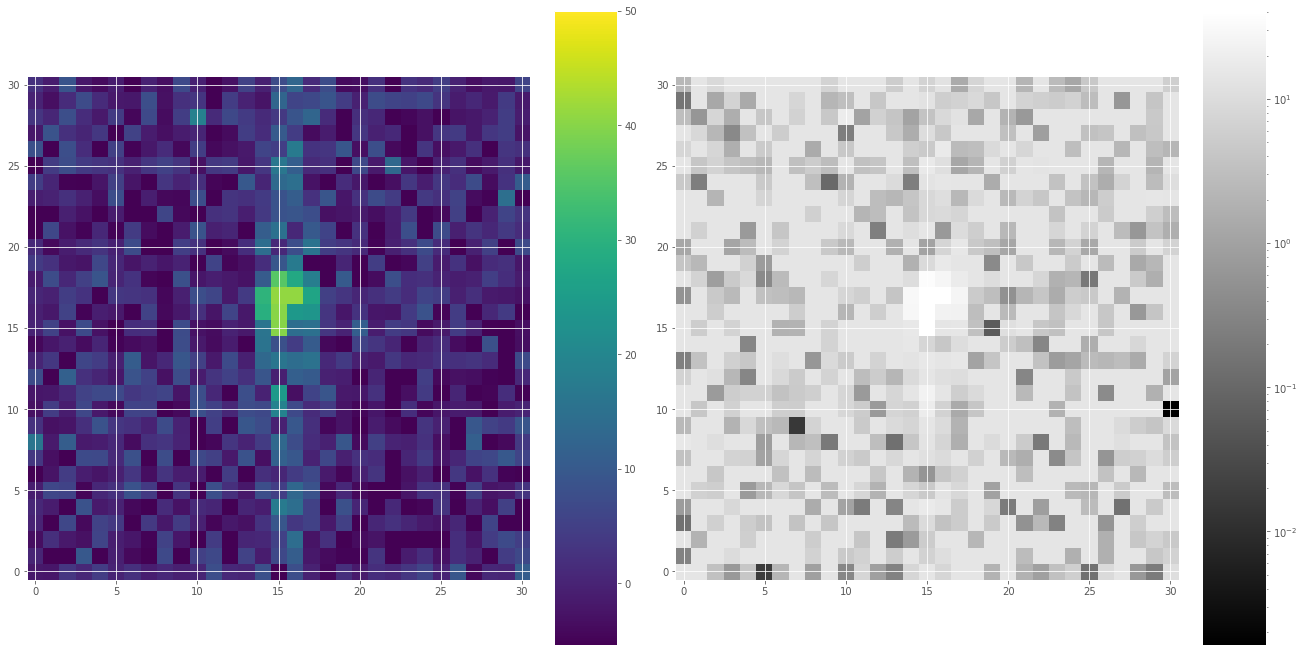

In [83]:
plotOnePeak(peakData, cx, cy, vmax=50)

In [71]:
from pfs.imageAnalysis import getRois
from matplotlib.colors import LogNorm


In [74]:
def plotOnePeak(image, cx,cy, roi_size=30, doBck=False, nRows=5, vmin=None, vmax=None, verbose=False):
    indx = cy
    indy = cx

    if type(image) is str:
        hdulist = fits.open(image, "readonly")
        image = hdulist[1].data
    

    data = np.copy(image)
    outer_data, inner_data = getRois(data, cx, cy, inner_size=5, outer_size=roi_size, doBck=doBck, nRows=nRows)    
    m, s = np.mean(outer_data), np.std(outer_data)
    if verbose:
        print(f"mean: {m}")
        print(f"std: {s}")
    vmin = vmin if vmin is not None else m-s
    vmax = vmax if vmax is not None else m+s
    
    fig, (ax, ax2) = plt.subplots(ncols=2, constrained_layout=True, figsize=(18,9))
    #ax = plt.subplot(111)
    im = ax.imshow(outer_data,interpolation="none", origin="lower", vmin=vmin, vmax=vmax)
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, ax=ax)

    #m = np.log10(np.where(outer_data>0, outer_data, -1))

    #ax2 = plt.subplot(121)
    im2 = ax2.imshow(outer_data,interpolation="none", origin="lower",cmap="gray", norm=LogNorm())
    
    fig.colorbar(im2, ax=ax2)
    plt.show()

# Characteristics calculation 

In [ ]:
df = pd.DataFrame(columns=["Peak", "Ghost", "Distance", "Ratio"], index=["ExpId,VisitId","Centroid", "Exptime", "Flux" ])

In [ ]:
print(iGhost)

df.loc["ExpId,VisitId"]["Peak"] = f"{peakExpId}, {peakFilelist.visitId[0]}"
df.loc["ExpId,VisitId"]["Ghost"] = f"{ghostExpId}, {ghostFilelist.visitId[0]}"
df.loc["ExpId,VisitId"]["Distance"] = ""
df.loc["ExpId,VisitId"]["Ratio"] = ""

df.loc["Centroid"]["Peak"] = f"({peakObjects['x'][iPeak]:.1f} ,{peakObjects['y'][iPeak]:.1f})"
df.loc["Centroid"]["Ghost"] = f"({ghostObjects['x'][iGhost]:.1f} ,{ghostObjects['y'][iGhost]:.1f})"
xShift = np.round(peakObjects['x'][iPeak]-ghostObjects['x'][iGhost], 1)
yShift = np.round(np.abs(peakObjects['y'][iPeak]-ghostObjects['y'][iGhost]), 1)  
df.loc["Centroid"]["Distance"] = f"({xShift}, {yShift})"
df.loc["Centroid"]["Ratio"] =""

df.loc["Flux"]["Peak"] = f"{peakObjects['cflux'][iPeak]:.0f}"
df.loc["Flux"]["Ghost"] = f"{ghostObjects['cflux'][iGhost]:.0f}"

peakExpTime = getFitsKey(peakFilepath, "Exptime")
ghostExpTime = getFitsKey(ghostFilepath, "Exptime")

ratio = ghostObjects['cflux'][iGhost]/(peakObjects['cflux'][iPeak] *ghostExpTime/peakExpTime )

df.loc["Flux"]["Distance"] = ""
df.loc["Flux"]["Ratio"] = f"{ratio:.2e}"

df.loc["Exptime"]["Peak"] = peakExpTime
df.loc["Exptime"]["Ghost"] = ghostExpTime

df.loc["Exptime"]["Distance"] = ""
df.loc["Exptime"]["Ratio"] = f"{ghostExpTime/peakExpTime:.1f}"

In [ ]:
peakExpTime = getFitsKey(peakFilepath, "Exptime")
ghostExpTime = getFitsKey(ghostFilepath, "Exptime")


print(peakExpTime)
print(ghostExpTime)

In [ ]:
imfile = f"SM1_{cam.upper()}_PeakGhost_summary_{wave}_Exp{ghostExpId}_{peakExpId}"

In [ ]:
from pandas.plotting import table # EDIT: see deprecation warnings below

ax = plt.subplot(111,frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
tabla = table(ax, df,loc='upper right')  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
#tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.2, 1.2)

plt.title(f"SM1 {cam.upper()} Ghost {wave}\n Exp{ghostExpId} -  Visit {ghostFilelist.visitId[0]}")

if doSave :
    plt.savefig(imgPath+imfile+'.png', bbox_inches='tight')

# Show and save peak and ghost images

also show the flux map coming from sep for flux calculation

In [ ]:
from matplotlib.patches import Ellipse
from matplotlib.patches import Rectangle

# plot background-subtracted image
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
"""
ax5 = fig.add_subplot(313)
ax5.xaxis.set_visible(False)  # hide the x axis
ax5.yaxis.set_visible(False)  # hide the y axis
ax5.set_facecolor('none')

tabla.auto_set_font_size(False) # Activate set fontsize manually
#tabla.scale(1.2, 1.2)
tabla = table(ax5, df)
"""

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_facecolor('none')

# Set common labels
ax.set_xlabel('Pixel X')
ax.set_ylabel('Pixel Y')

# Main peal=k

m, s = np.mean(peakData), np.std(peakData)
im = ax1.imshow(peakData, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')


r = Rectangle(xy=(peakObjects['xmin'][iPeak], peakObjects['ymin'][iPeak]),
              width=peakObjects['xmax'][iPeak]-peakObjects['xmin'][iPeak],
              height= peakObjects['ymax'][iPeak]-peakObjects['ymin'][iPeak],)
#                  angle=objects['theta'][i] * 180. / np.pi)
r.set_facecolor('none')
r.set_edgecolor('red')
ax1.add_artist(r)
roi = 30
#ax[0,0].xlim(peakObjects['x'][0]-roi,peakObjects['x'][0]+roi)
#ax[0,0].ylim(peakObjects['y'][0]-roi, peakObjects['y'][0]+roi)
ax1.set(xlim=(peakObjects['x'][iPeak]-roi,peakObjects['x'][iPeak]+roi), \
             ylim=(peakObjects['y'][iPeak]-roi, peakObjects['y'][iPeak]+roi))

#ax[0,0].set_xlabel("Pixel x")
#ax[0,0].set_ylabel("Pixel y")
#ax[0, 0].set_title(f"SM1 {cam.upper()} Peak {wave}nm\n Exp{peakExpId} -  Visit {peakFilelist.visitId[0]}")
ax1.set_title(f"Peak Visit {peakFilelist.visitId[0]}")


annot = f"{peakObjects['cflux'][iPeak]:.0f} ADU"
#ax[0,0].annotate(annot,  xy=(.6,.2),xycoords="figure fraction", color="r")


# flux mask
im = ax3.imshow(peakData*peakMap, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')
ax3.set(xlim=(peakObjects['x'][iPeak]-roi,peakObjects['x'][iPeak]+roi), \
             ylim=(peakObjects['y'][iPeak]-roi, peakObjects['y'][iPeak]+roi))

ax3.set_title(f"Flux map {annot}")



m, s = np.mean(ghostData), np.std(ghostData)

#im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
#               vmin=m-s, vmax=m+s, origin='lower')

im = ax2.imshow(ghostData, interpolation='none', cmap='gray',
               vmin=0, vmax=20, origin='lower')

# ghost


r = Rectangle(xy=(ghostObjects['xmin'][iGhost], ghostObjects['ymin'][iGhost]),
              width=ghostObjects['xmax'][iGhost]-ghostObjects['xmin'][iGhost],
              height= ghostObjects['ymax'][iGhost]-ghostObjects['ymin'][iGhost],)
#                  angle=objects['theta'][i] * 180. / np.pi)
r.set_facecolor('none')
r.set_edgecolor('red')
ax2.add_artist(r)
#roi = 10

ax2.set(xlim=(ghostObjects['x'][iGhost]-roi,ghostObjects['x'][iGhost]+roi), \
             ylim=(ghostObjects['y'][iGhost]-roi, ghostObjects['y'][iGhost]+roi))


ax2.set_title(f"Ghost Visit {ghostFilelist.visitId[0]}")

annot = f"{ghostObjects['cflux'][iGhost]:.0f} ADU"
#ax[0,1].annotate(annot,  xy=(.7,.2),xycoords="figure fraction", color="r")

# ghost mask


m, s = np.mean(ghostData*ghostMap), np.std(ghostData*ghostMap)

im = ax4.imshow(ghostData*ghostMap, interpolation='none', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')
ax4.set(xlim=(ghostObjects['x'][iGhost]-roi,ghostObjects['x'][iGhost]+roi), \
             ylim=(ghostObjects['y'][iGhost]-roi, ghostObjects['y'][iGhost]+roi))

ax4.set_title(f"Flux map {annot}")

#ax.set_xlabel("Pixel x")
#ax.set_ylabel("Pixel y")
fig.suptitle(f"SM1 {cam.upper()} Peak {wave}", size=16)
#fig.subplots_adjust(top=0.8)


#fig.suptitle(f"SM1 {cam.upper()} Ghost {wave}nm\n Exp{ghostExpId} -  Visit {ghostFilelist.visitId[0]}")

plotfile = f"SM1_{cam.upper()}_PeakGhost_{wave}_Exp{ghostExpId}_{peakExpId}"
print(plotfile)

#annot = f"{objects['cflux'][i]:.0f} ADU"
#ax.annotate(annot,  xy=(.6,.2),xycoords="figure fraction", color="r")
if doSave:
    plt.savefig(imgPath+plotfile+".png", bbox_inches = "tight")




#plt.savefig(imgPath+plotfile+".png", bbox_inches = "tight")


# Image of the distance between peak and ghost

In [ ]:
# setup
from ginga.web.pgw import ipg
# Set this to True if you have a non-buggy python OpenCv bindings--it greatly speeds up some operations
use_opencv = False

server = ipg.make_server(host='localhost', port=9913, use_opencv=use_opencv)

# Start viewer server
# IMPORTANT: if running in an IPython/Jupyter notebook, use the no_ioloop=True option
server.start(no_ioloop=True)

In [ ]:
# Get a viewer
# This will get a handle to the viewer v1 = server.get_viewer('v1')
v1 = server.get_viewer('v1')
v1.url

In [ ]:
v1.open()

In [ ]:
v1.clear()

In [ ]:
v1.load(ghostFilepath)

In [ ]:
canvas = v1.add_canvas()

In [ ]:
canvas.delete_all_objects()

In [ ]:
# add peak crosshair on ghost images
crosshair = canvas.get_draw_class('Crosshair')
canvas.add(crosshair(float(peakObjects['x'][iPeak]),float(peakObjects['y'][iPeak]), \
                     radius=10, color='blue', textcolor='blue', fontsize=15))
#canvas.add('Crosshair',float(peakObjects['x'][0]),float(peakObjects['y'][0]), radius=10, color='blue', textcolor='blue')

In [ ]:
# add ghost crosshair on ghost images
canvas.add(crosshair(float(ghostObjects['x'][iGhost]),float(ghostObjects['y'][iGhost]), radius=10, color='red', textcolor='red', fontsize=15))

In [ ]:
ruler = canvas.get_draw_class('Ruler')
canvas.add(ruler(float(peakObjects['x'][iPeak]),float(peakObjects['y'][iPeak]), \
           float(ghostObjects['x'][iGhost]),float(ghostObjects['y'][iGhost]),\
          units="pixels", color="green", color2="green", fontsize=20))

In [ ]:
v1.show()

In [ ]:
imfile = f"SM1_{cam.upper()}_PeakGhost_Centroid_{wave}_Exp{ghostExpId}_{peakExpId}"

In [ ]:
if doSave:
    v1.save_rgb_image_as_file(imgPath+imfile+'.png')